## Logistic Regression

## Sigmoid function

+ $\sigma(z)= \frac{1}{1+exp(-z)}$ $\Longrightarrow$ $\sigma(w^Tx) = \frac{1}{1+exp^(-w^Tx)}$
+ $\sigma(z)$ is called sigmoid function or logistic function
+ always generates a value between 0 and 1

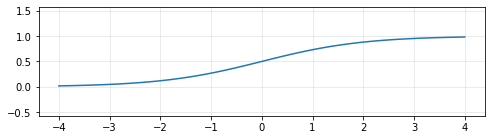

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z = np.linspace(-4,4,100)
s = 1/(1 + np.exp(-z))

plt.figure(figsize=(8,2))
plt.plot(z, s)
plt.xlim([-4, 4])
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

**benefit of the sigmoid function**
1. Monotonic
2. Continuous and differentiable $\rightarrow$ gradient descent
3. Probability $\rightarrow$ can be considered as probability

+ Probability that the label is $+1$ <br>
$P(y=+1 | x;w) = \frac{1}{1+exp(-w^Tx)}$ $ = f(x;w)$
+ Probability that the label is $0$ <br>
$P(y=0 | x;w) = 1-P(y=+1 | x,w)$ $=1-f(x;w)$

Then,<br>
$P(y|x;w) = (f(x;w))^y(1-f(x;w))^{1-y}$ <br>

For $D = \{x_i, y_i\}^{N}_{i=1}$ <br><br>
the likelihood function would be <br><br>
$L_1(w)=$$\Pi^{N}_{i=1}P(y_{i}|x_{i};w)$$ = \Pi^{N}_{i=1}$$(f(x_i;w))^{y_i}$$(1-f(x_i;w))^{1-y_i}$

**log likelihood** <br>
$logL_1(w)$ $=\Sigma^{N}_{i=1}y_ilogf(x_i) + (1-y_i)log(1-f(x_i))$ <br><br>
take -(minus) <br>
we could get the **cross-entropy** <br>
$L_2(w) = $$\Sigma^{N}_{i=1}-y_ilogf(x_i) - (1-y_i)log(1-f(x_i))$

+ The logistic regression problem is (convex) optimization problem<br>
$w^* = \underset{w}{\operatorname{argmax}}L_2(w)$

## Gradient Descent

### Scikit learn

In [2]:
## data generation

datanum1 = 50
datanum2 = 50
mean1 = np.array([0,0])
mean2 = np.array([1, -.5])
cov1 = np.array([[.1, .02],[.02, .1]])
cov2 = np.array([[.1, .02],[.02, .1]])
data1 = np.random.multivariate_normal(mean1, cov1, datanum1)
data2 = np.random.multivariate_normal(mean2, cov2, datanum2)
y = np.empty([datanum1+datanum2,1])
y[:datanum1] = 1
y[datanum1:datanum1+datanum2] = 0

dataset = np.vstack((data1, data2))

X = np.hstack([np.ones([datanum1+datanum2, 1]), dataset])
X.shape

(100, 3)

(-0.9155487847197246,
 1.5946659866551554,
 -1.5232354386048639,
 0.8582996765883183)

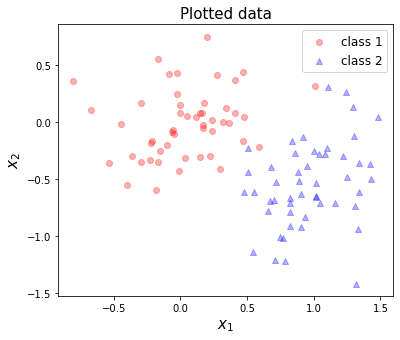

In [3]:
# draw data
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(data1[:,0], data1[:,1], color='red', label='class 1', alpha =.3)
ax.scatter(data2[:,0], data2[:,1], color='blue', marker='^', label='class 2', alpha =.3)

ax.set_title('Plotted data', fontsize = 15)
ax.legend()
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
[x1min, x1max, x2min, x2max] = ax.axis()
ax.axis([x1min, x1max, x2min, x2max])
#ax.grid()

In [4]:
w = np.array([[-6], [2], [1]])
w = np.asmatrix(w)
X = np.asmatrix(X)

In [5]:
X = X[:,1:3]

from sklearn import linear_model

clf = linear_model.LogisticRegression(solver='lbfgs')
clf.fit(X,np.ravel(y))

LogisticRegression()

In [6]:
clf.coef_

array([[-3.59906523,  2.31797697]])

In [7]:
clf.intercept_

array([2.495943])

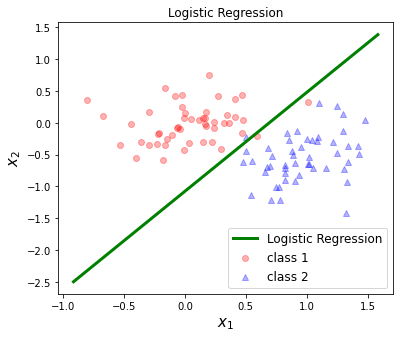

In [8]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

px = np.arange(x1min, x1max, 0.1).reshape(-1, 1)
py = - w1/w2*px - w0/w2

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(data1[:,0], data1[:,1], color='red', label='class 1', alpha =.3)
ax.scatter(data2[:,0], data2[:,1], color='blue', marker='^', label='class 2', alpha =.3)
plt.plot(px, py, 'g', linewidth = 3, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()